<a href="https://colab.research.google.com/github/Sakthivel-ml/Chronic-Kidney-Disease-Classification/blob/main/chronic_classify_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn modules for machine learning tasks

from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.impute import SimpleImputer              # To handle missing values
from sklearn.naive_bayes import GaussianNB            # Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier
from sklearn.tree import DecisionTreeClassifier       # Decision Tree classifier
from sklearn.svm import SVC                           # Support Vector Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Evaluation metrics


**Load the Dataset**

In [2]:
# Load the dataset and create a copy
df = pd.read_csv('/content/kidney_disease.csv')
df_stage = df.copy()

# Basic information
df_stage.info()
print("Dataset shape:", df_stage.shape)

# Drop unnecessary columns (like 'id')
df_stage.drop('id', axis=1, inplace=True)

# Summary statistics
print(df_stage.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**Rename Columns**

In [3]:
df_stage.columns = [
    'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed Cell Volume',
    'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
    'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
    'Pedal Edema', 'Anemia', 'Class'
]


**Data Cleaning**

In [4]:
text_columns = ["Packed Cell Volume","White Blood Cell Count","Red Blood Cell Count"]
#objects
for i in text_columns:
  print(f"{i} : {df_stage[i].dtype}")

Packed Cell Volume : object
White Blood Cell Count : object
Red Blood Cell Count : object


Convert Text to Numeric for Specific Columns
**bold text**

In [5]:
def convert_text_to_numeric(df_stage, column):
  df_stage[column] = pd.to_numeric(df_stage[column], errors = 'coerce')
#numerics
for column in text_columns:
  convert_text_to_numeric(df_stage, column)
  print(f"{column} : {df_stage[column].dtype}")

Packed Cell Volume : float64
White Blood Cell Count : float64
Red Blood Cell Count : float64


**Handle Missing Values**

In [6]:
# Function to handle missing values
def mean_value_imputation(df, column):
    df[column] = df[column].fillna(df[column].mean())

def mode_value_imputation(df, column):
    df[column] = df[column].fillna(df[column].mode()[0])

# Separate numerical and categorical columns
num_cols = [col for col in df_stage.columns if df_stage[col].dtype != 'object']
cat_cols = [col for col in df_stage.columns if df_stage[col].dtype == 'object']

# Impute missing values
for col in num_cols:
    mean_value_imputation(df_stage, col)

for col in cat_cols:
    mode_value_imputation(df_stage, col)


**Fix Data Inconsistencies**

In [7]:
print(f"Diabetes_Mellitus :- {df_stage['Diabetes Mellitus'].unique()}")
print(f"Coronary_Artery Disease :- {df_stage['Coronary Artery Disease'].unique()}")
print(f"Class :- {df_stage['Class'].unique()}")

Diabetes_Mellitus :- ['yes' 'no' ' yes' '\tno' '\tyes']
Coronary_Artery Disease :- ['no' 'yes' '\tno']
Class :- ['ckd' 'ckd\t' 'notckd']


Clean inconsistent values in categorical columns.

In [8]:
df_stage['Diabetes Mellitus'] = df_stage['Diabetes Mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df_stage['Coronary Artery Disease'] = df_stage['Coronary Artery Disease'].replace(to_replace = '\tno', value = 'no')
df_stage['Class'] = df_stage['Class'].replace(to_replace = {'ckd\t':'ckd','notckd' : 'not ckd'})

In [9]:
print(f"Diabetes_Mellitus :- {df_stage['Diabetes Mellitus'].unique()}")
print(f"Coronary_Artery Disease :- {df_stage['Coronary Artery Disease'].unique()}")
print(f"Class :- {df_stage['Class'].unique()}")

Diabetes_Mellitus :- ['yes' 'no']
Coronary_Artery Disease :- ['no' 'yes']
Class :- ['ckd' 'not ckd']


**Encode Categorical Variables**

In [10]:
# categorical to numeric
df_stage['Class'] = df_stage['Class'].map({'ckd': 1, 'not ckd': 0})
df_stage['Red Blood Cells'] = df_stage['Red Blood Cells'].map({'normal': 1, 'abnormal': 0})
df_stage['Pus Cell'] = df_stage['Pus Cell'].map({'normal': 1, 'abnormal': 0})
df_stage['Pus Cell Clumps'] = df_stage['Pus Cell Clumps'].map({'present': 1, 'notpresent': 0})
df_stage['Bacteria'] = df_stage['Bacteria'].map({'present': 1, 'notpresent': 0})
df_stage['Hypertension'] = df_stage['Hypertension'].map({'yes': 1, 'no': 0})
df_stage['Diabetes Mellitus'] = df_stage['Diabetes Mellitus'].map({'yes': 1, 'no': 0})
df_stage['Coronary Artery Disease'] = df_stage['Coronary Artery Disease'].map({'yes': 1, 'no': 0})
df_stage['Appetite'] = df_stage['Appetite'].map({'good': 1, 'poor': 0})
df_stage['Pedal Edema'] = df_stage['Pedal Edema'].map({'yes': 1, 'no': 0})
df_stage['Anemia'] = df_stage['Anemia'].map({'yes': 1, 'no': 0})


**Exploratory Data Analysis (EDA)**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Heatmap

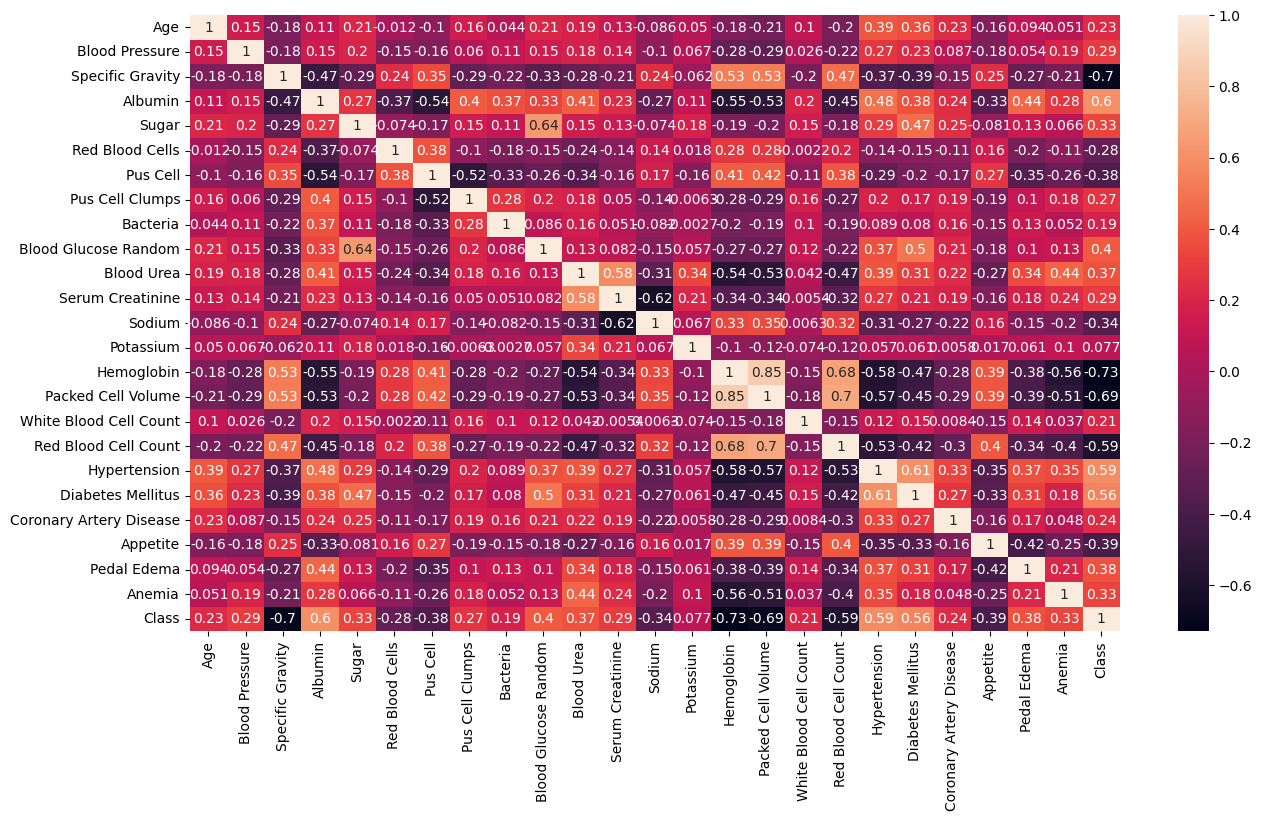

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(df_stage.corr(), annot = True)
plt.show()

In [13]:
target_corr = df_stage.corr()['Class'].abs().sort_values(ascending = False)[1:]
target_corr

,Class
Hemoglobin,0.729628
Specific Gravity,0.698957
Packed Cell Volume,0.690060
Albumin,0.599238
Red Blood Cell Count,0.590913
Hypertension,0.590438
Diabetes Mellitus,0.559060
Blood Glucose Random,0.401374
Appetite,0.393341
Pus Cell,0.375154


**Split Data for Model Building**

In [14]:
df_stage['Class'].value_counts()

,count
Class,
1,250
0,150


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x = df_stage.drop('Class', axis = 1)
y = df_stage['Class']

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=25)
print(f"'x_train' shape : {x_train.shape}")
print(f"'x_test' shape : {x_test.shape}")

'x_train' shape : (300, 24)
'x_test' shape : (100, 24)


**Model Training and Evaluation**

Train multiple machine learning models and compare their performance.

In [17]:
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Define models
models = [
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC(kernel='linear'))
]

# Train and evaluate models
for name, model in models:
    print(f"Model: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Metrics
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\n")


Model: Naive Bayes
Confusion Matrix:
 [[37  0]
 [ 5 58]]
Accuracy: 0.95
Precision: 1.0
Recall: 0.9206349206349206
F1 Score: 0.9586776859504132


Model: KNN
Confusion Matrix:
 [[27 10]
 [16 47]]
Accuracy: 0.74
Precision: 0.8245614035087719
Recall: 0.746031746031746
F1 Score: 0.7833333333333333


Model: Random Forest
Confusion Matrix:
 [[35  2]
 [ 0 63]]
Accuracy: 0.98
Precision: 0.9692307692307692
Recall: 1.0
F1 Score: 0.984375


Model: Decision Tree
Confusion Matrix:
 [[35  2]
 [ 2 61]]
Accuracy: 0.96
Precision: 0.9682539682539683
Recall: 0.9682539682539683
F1 Score: 0.9682539682539683


Model: SVM
Confusion Matrix:
 [[34  3]
 [ 2 61]]
Accuracy: 0.95
Precision: 0.953125
Recall: 0.9682539682539683
F1 Score: 0.9606299212598425


